In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

In [38]:
train_df=pd.read_csv("../input/janatahack-healthcare-analytics-ii/Train/train.csv")
test_df=pd.read_csv("../input/janatahack-healthcare-analytics-ii/test.csv")

In [39]:
train_df['train_flag'] = 1
test_df['train_flag'] = 0

test_df['Stay'] = -1

In [40]:
df_data = pd.concat((train_df, test_df))
df_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,train_flag
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,-1,0
137053,455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,-1,0
137054,455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,-1,0
137055,455494,5,a,1,X,2,anesthesia,R,E,4.0,57021,10.0,Trauma,Minor,2,41-50,5435.0,-1,0


In [41]:
train_df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
train_flag                              0
dtype: int64

In [42]:
train_df["Hospital_type_code"].value_counts()

a    143425
b     68946
c     45928
e     24770
d     20389
f     10703
g      4277
Name: Hospital_type_code, dtype: int64

In [43]:
train_df["Hospital_region_code"].value_counts()

X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64

In [44]:
train_df["Department"].value_counts()

gynecology            249486
anesthesia             29649
radiotherapy           28516
TB & Chest disease      9586
surgery                 1201
Name: Department, dtype: int64

In [45]:
train_df["Ward_Type"].value_counts()

R    127947
Q    106165
S     77794
P      5046
T      1477
U         9
Name: Ward_Type, dtype: int64

In [46]:
train_df["Ward_Facility_Code"].value_counts()

F    112753
E     55351
D     51809
C     35463
B     35156
A     27906
Name: Ward_Facility_Code, dtype: int64

In [47]:
train_df["Type of Admission"].value_counts()

Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64

In [48]:
train_df["Severity of Illness"].value_counts()

Moderate    175843
Minor        85872
Extreme      56723
Name: Severity of Illness, dtype: int64

In [49]:
train_df["Age"].value_counts()

41-50     63749
31-40     63639
51-60     48514
21-30     40843
71-80     35792
61-70     33687
11-20     16768
81-90      7890
0-10       6254
91-100     1302
Name: Age, dtype: int64

In [50]:
train_df.head(20)

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,train_flag
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,1
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,1
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,1
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,1
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,1
5,6,23,a,6,X,2,anesthesia,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,4449.0,11-20,1
6,7,32,f,9,Y,1,radiotherapy,S,B,3.0,31397,7.0,Emergency,Extreme,2,51-60,6167.0,0-10,1
7,8,23,a,6,X,4,radiotherapy,Q,F,3.0,31397,7.0,Trauma,Extreme,2,51-60,5571.0,41-50,1
8,9,1,d,10,Y,2,gynecology,R,B,4.0,31397,7.0,Trauma,Extreme,2,51-60,7223.0,51-60,1
9,10,10,e,1,X,2,gynecology,S,E,3.0,31397,7.0,Trauma,Extreme,2,51-60,6056.0,31-40,1


In [51]:
train_df.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
train_flag                             int64
dtype: object

In [52]:
train_df["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [53]:
train_df["Bed Grade"].unique()

array([ 2.,  3.,  4.,  1., nan])

In [54]:
sorted(train_df["City_Code_Patient"].unique())

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 13.0,
 14.0,
 nan,
 11.0,
 12.0,
 15.0,
 16.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0]

In [55]:
def amt_bands(row):
    if row['Admission_Deposit'] <= 3000:
        return 1
    elif row['Admission_Deposit'] > 3000 and row['Admission_Deposit'] <= 4200:
        return 2
    elif row['Admission_Deposit'] > 4200 and row['Admission_Deposit'] <=4700:
        return 3
    elif row['Admission_Deposit'] > 4700 and row['Admission_Deposit'] <=5500:
        return 4
    elif row['Admission_Deposit'] > 5500:
        return 5
    

In [56]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
def preprocess(train_df):

    train_df['Hospital_type_code'] = le.fit_transform(train_df['Hospital_type_code'])
    train_df['Hospital_region_code'] = le.fit_transform(train_df['Hospital_region_code'])
    train_df['Department'] = le.fit_transform(train_df['Department'])
    train_df['Ward_Type'] = le.fit_transform(train_df['Ward_Type'])
    train_df['Ward_Facility_Code'] = le.fit_transform(train_df['Ward_Facility_Code'])
    train_df['Type of Admission'] = le.fit_transform(train_df['Type of Admission'])
    train_df['Severity of Illness'] = le.fit_transform(train_df['Severity of Illness'])
    train_df["Age"]=le.fit_transform(train_df["Age"])
    train_df["Bed Grade"]=np.where(train_df["Bed Grade"].isna(),99,train_df["Bed Grade"])
    train_df["City_Code_Patient"]=np.where(train_df["City_Code_Patient"].isna(),99,train_df["City_Code_Patient"])
    train_df["Bed Grade"]=train_df["Bed Grade"].astype("int64")
    train_df["City_Code_Patient"]=train_df["City_Code_Patient"].astype("int64")
    train_df["Admission_Deposit"]=train_df["Admission_Deposit"].astype("int64")
    train_df = train_df.assign(Admission_band = train_df.apply(amt_bands,axis=1))
#     train_df["Admission_Deposit"]=preprocessing.normalize([train_df.loc[:,"Admission_Deposit"]])[0]  
#     train_df.drop(["patientid","Hospital_code"],axis=1,inplace=True)  
    return train_df

In [57]:
df_data=preprocess(df_data)
# test_df=preprocess(test_df)
# le_stay=LabelEncoder()
# train_df["Stay"]=le_stay.fit_transform(train_df["Stay"])

In [58]:
df_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,train_flag,Admission_band
0,1,8,2,3,2,3,3,2,5,2,31397,7,0,0,2,5,4911,0-10,1,4
1,2,2,2,5,2,2,3,3,5,2,31397,7,1,0,2,5,5954,41-50,1,5
2,3,10,4,1,0,2,1,3,4,2,31397,7,1,0,2,5,4745,31-40,1,4
3,4,26,1,2,1,2,3,2,3,2,31397,7,1,0,2,5,7272,41-50,1,5
4,5,26,1,2,1,2,3,3,3,2,31397,7,1,0,2,5,5558,41-50,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,1,4,1,1,3,3,41160,3,0,1,4,4,6313,-1,0,5
137053,455492,25,4,1,0,2,3,2,4,4,30985,7,0,2,2,0,3510,-1,0,2
137054,455493,30,2,3,2,2,1,2,0,4,81811,12,2,1,2,0,7190,-1,0,5
137055,455494,5,0,1,0,2,1,2,4,4,57021,10,1,1,2,4,5435,-1,0,4


In [59]:

df_data['cases_cnt_per_patientId']=df_data.groupby(['patientid'])['case_id'].transform('nunique')

df_data['cases_cnt_per_patientId per hospital']=df_data.groupby(['patientid','Hospital_code'])['case_id'].transform('nunique')

df_data['cases_cnt_per_patientId per severity']=df_data.groupby(['patientid','Severity of Illness'])['case_id'].transform('nunique')

df_data['cases_cnt_per_patientId per admissiontype']=df_data.groupby(['patientid','Type of Admission'])['case_id'].transform('nunique')

df_data['cases_cnt_per_patientId per department']=df_data.groupby(['patientid','Department'])['case_id'].transform('nunique')


#amount_band and case id

df_data['amount band cnt patient by hospital code'] = df_data.groupby(['patientid','Hospital_code'])['Admission_band'].transform('nunique')

df_data['amount band age group cases'] = df_data.groupby(['Admission_band','Age'])['case_id'].transform('nunique')
df_data['amount band age group admission type case ids'] = df_data.groupby(['Admission_band','Type of Admission'])['case_id'].transform('nunique')

df_data['cases cnt by amount band'] = df_data.groupby(['Admission_band'])['case_id'].transform('nunique')
df_data['amout band hospital group'] = df_data.groupby(['Admission_band'])['Hospital_code'].transform('nunique')
df_data['amout band severity group'] = df_data.groupby(['Admission_band'])['Severity of Illness'].transform('nunique')

df_data['amount band bed grade group'] = df_data.groupby(['Admission_band'])['Bed Grade'].transform('mean')

df_data['severity_cnt_per_patientid'] = df_data.groupby(['patientid','Hospital_code'])['Severity of Illness'].transform('nunique')

df_data['addmissiontype_cnt_per_patientid'] = df_data.groupby(['patientid','Hospital_code'])['Type of Admission'].transform('nunique')

df_data['department_cnt_per_patientid'] = df_data.groupby(['patientid','Hospital_code'])['Department'].transform('nunique')

df_data['avg visitors per patient per hospital'] = df_data.groupby(['patientid','Hospital_code'])['Visitors with Patient'].transform('mean')

df_data['avg visitors per patient per hospital per admission'] = df_data.groupby(['patientid','Hospital_code','Type of Admission'])['Visitors with Patient'].transform('mean')

df_data['avg visitors per patient per hospital per severity'] = df_data.groupby(['patientid','Hospital_code','Severity of Illness'])['Visitors with Patient'].transform('mean')

df_data['Total money spent per patient per hospital']=df_data.groupby(['patientid','Hospital_code'])['Admission_Deposit'].transform('sum')

df_data['Total money spent per patient per hospital per dept'] =  df_data.groupby(['patientid','Hospital_code','Department'])['Admission_Deposit'].transform('sum')

df_data['Total money spent per patient per hospital per severity'] =  df_data.groupby(['patientid','Hospital_code','Severity of Illness'])['Admission_Deposit'].transform('sum')

df_data['Total money spent per patient per hospital per admission type'] =  df_data.groupby(['patientid','Hospital_code','Type of Admission'])['Admission_Deposit'].transform('sum')

#ageband vars

df_data['Age group patients_id'] = df_data.groupby(['Age'])['patientid'].transform('nunique')
df_data['Age group amt deposit'] = df_data.groupby(['Age'])['Admission_Deposit'].transform('mean')
df_data['Age group hospital code'] = df_data.groupby(['Age'])['Hospital_code'].transform('nunique')
df_data['Age group severity '] = df_data.groupby(['Age'])['Severity of Illness'].transform('nunique')
df_data['Age group admission type'] = df_data.groupby(['Age'])['Type of Admission'].transform('nunique')
df_data['Age group admission type case ids'] = df_data.groupby(['Age','Type of Admission'])['case_id'].transform('nunique')



df_data['number of hospital codes per patient per severity'] = df_data.groupby(['patientid','Severity of Illness'])['Hospital_code'].transform('nunique')

df_data['avg bed grade per patient per hospital'] =  df_data.groupby(['patientid','Hospital_code'])['Bed Grade'].transform('mean')

df_data['avg bed grade per patient per hospital severity of ilnness'] =  df_data.groupby(['patientid','Hospital_code','Severity of Illness'])['Bed Grade'].transform('mean')

df_data['avg bed grade per patient per hospital Department'] =  df_data.groupby(['patientid','Hospital_code','Department'])['Bed Grade'].transform('mean')

df_data['extra beds per hospital per patient avg']=  df_data.groupby(['patientid','Hospital_code'])['Available Extra Rooms in Hospital'].transform('mean')

df_data['extra beds per hospital per patient per dept avg']=  df_data.groupby(['patientid','Hospital_code','Department'])['Available Extra Rooms in Hospital'].transform('mean')

df_data['extra beds per hospital per patient per severity avg']=  df_data.groupby(['patientid','Hospital_code', 'Severity of Illness'])['Available Extra Rooms in Hospital'].transform('mean')

df_data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,Age group severity,Age group admission type,Age group admission type case ids,number of hospital codes per patient per severity,avg bed grade per patient per hospital,avg bed grade per patient per hospital severity of ilnness,avg bed grade per patient per hospital Department,extra beds per hospital per patient avg,extra beds per hospital per patient per dept avg,extra beds per hospital per patient per severity avg
0,1,8,2,3,2,3,3,2,5,2,...,3,3,25372,10,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
1,2,2,2,5,2,2,3,3,5,2,...,3,3,35357,10,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
2,3,10,4,1,0,2,1,3,4,2,...,3,3,35357,10,2.500000,2.500000,2.000000,2.000000,2.000000,2.000000
3,4,26,1,2,1,2,3,2,3,2,...,3,3,35357,10,1.666667,1.666667,1.666667,2.666667,2.666667,2.666667
4,5,26,1,2,1,2,3,3,3,2,...,3,3,35357,10,1.666667,1.666667,1.666667,2.666667,2.666667,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137052,455491,11,1,2,1,4,1,1,3,3,...,3,3,33939,1,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000
137053,455492,25,4,1,0,2,3,2,4,4,...,3,3,3446,1,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000
137054,455493,30,2,3,2,2,1,2,0,4,...,3,3,2229,1,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000
137055,455494,5,0,1,0,2,1,2,4,4,...,3,3,45086,1,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [60]:
feature_cols = df_data.columns.tolist()
feature_cols.remove('patientid')
feature_cols.remove('case_id')
feature_cols.remove('Stay')
feature_cols.remove('train_flag')

label_col = 'Stay'
print(feature_cols)

['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital', 'Hospital_region_code', 'Available Extra Rooms in Hospital', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade', 'City_Code_Patient', 'Type of Admission', 'Severity of Illness', 'Visitors with Patient', 'Age', 'Admission_Deposit', 'Admission_band', 'cases_cnt_per_patientId', 'cases_cnt_per_patientId per hospital', 'cases_cnt_per_patientId per severity', 'cases_cnt_per_patientId per admissiontype', 'cases_cnt_per_patientId per department', 'amount band cnt patient by hospital code', 'amount band age group cases', 'amount band age group admission type case ids', 'cases cnt by amount band', 'amout band hospital group', 'amout band severity group', 'amount band bed grade group', 'severity_cnt_per_patientid', 'addmissiontype_cnt_per_patientid', 'department_cnt_per_patientid', 'avg visitors per patient per hospital', 'avg visitors per patient per hospital per admission', 'avg visitors per patient per hospital per severit

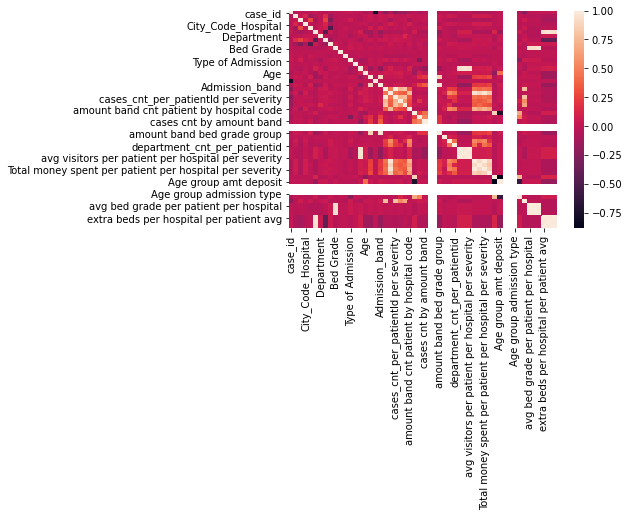

In [61]:
import seaborn as sns
cor=df_data.corr()
sns.heatmap(cor)

In [62]:
from catboost import Pool, CatBoostClassifier
model = CatBoostClassifier(
    iterations=759,
    learning_rate=0.06,
    random_strength=0.1,
    depth=10,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    leaf_estimation_method='Newton',
    task_type="GPU",
    devices='0:1'
)

In [63]:
df_train, df_test = df_data[df_data.train_flag == 1], df_data[df_data.train_flag == 0]

df_train.drop(['train_flag'], inplace=True, axis=1)
df_test.drop(['train_flag'], inplace=True, axis=1)
df_test.drop([label_col], inplace=True, axis=1)

print(df_train.shape, df_test.shape)

(318438, 54) (137057, 53)


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [64]:
df_train_, df_eval = train_test_split(df_train, test_size=0.25, random_state=42, shuffle=True, stratify=df_train[label_col])

In [65]:
model.fit(df_train_[feature_cols], df_train_[label_col],plot=True,
          eval_set=[ (df_eval[feature_cols], df_eval[label_col])]
         )
print('\n Model Trainied')


eval_score = accuracy_score(df_eval[label_col], model.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

best_iter = model.best_iteration_

print(best_iter)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3970766	test: 0.3950886	best: 0.3950886 (0)	total: 80.9ms	remaining: 1m 1s
1:	learn: 0.3977465	test: 0.3961688	best: 0.3961688 (1)	total: 144ms	remaining: 54.3s
2:	learn: 0.3981066	test: 0.3965582	best: 0.3965582 (2)	total: 206ms	remaining: 52s
3:	learn: 0.3991617	test: 0.3969602	best: 0.3969602 (3)	total: 274ms	remaining: 51.8s
4:	learn: 0.4013851	test: 0.3997613	best: 0.3997613 (4)	total: 337ms	remaining: 50.8s
5:	learn: 0.4026831	test: 0.4011305	best: 0.4011305 (5)	total: 398ms	remaining: 49.9s
6:	learn: 0.4031269	test: 0.4014445	best: 0.4014445 (6)	total: 462ms	remaining: 49.6s
7:	learn: 0.4042449	test: 0.4024494	best: 0.4024494 (7)	total: 526ms	remaining: 49.4s
8:	learn: 0.4045380	test: 0.4026253	best: 0.4026253 (8)	total: 588ms	remaining: 49s
9:	learn: 0.4054843	test: 0.4036302	best: 0.4036302 (9)	total: 655ms	remaining: 49s
10:	learn: 0.4066650	test: 0.4044844	best: 0.4044844 (10)	total: 715ms	remaining: 48.6s
11:	learn: 0.4074857	test: 0.4054265	best: 0.4054265 (11)

94:	learn: 0.4397474	test: 0.4239040	best: 0.4241929 (93)	total: 6.16s	remaining: 43.1s
95:	learn: 0.4399568	test: 0.4237784	best: 0.4241929 (93)	total: 6.23s	remaining: 43s
96:	learn: 0.4402080	test: 0.4239040	best: 0.4241929 (93)	total: 6.3s	remaining: 43s
97:	learn: 0.4403504	test: 0.4239668	best: 0.4241929 (93)	total: 6.36s	remaining: 42.9s
98:	learn: 0.4407942	test: 0.4241301	best: 0.4241929 (93)	total: 6.43s	remaining: 42.9s
99:	learn: 0.4411627	test: 0.4245070	best: 0.4245070 (99)	total: 6.49s	remaining: 42.8s
100:	learn: 0.4413260	test: 0.4244442	best: 0.4245070 (99)	total: 6.56s	remaining: 42.7s
101:	learn: 0.4415102	test: 0.4243814	best: 0.4245070 (99)	total: 6.63s	remaining: 42.7s
102:	learn: 0.4416693	test: 0.4243688	best: 0.4245070 (99)	total: 6.7s	remaining: 42.7s
103:	learn: 0.4417782	test: 0.4245070	best: 0.4245070 (99)	total: 6.76s	remaining: 42.6s
104:	learn: 0.4420252	test: 0.4242934	best: 0.4245070 (99)	total: 6.82s	remaining: 42.5s
105:	learn: 0.4423644	test: 0.424

188:	learn: 0.4605783	test: 0.4264414	best: 0.4266424 (186)	total: 12.9s	remaining: 38.8s
189:	learn: 0.4608840	test: 0.4262655	best: 0.4266424 (186)	total: 12.9s	remaining: 38.7s
190:	learn: 0.4612943	test: 0.4264414	best: 0.4266424 (186)	total: 13s	remaining: 38.7s
191:	learn: 0.4614074	test: 0.4264916	best: 0.4266424 (186)	total: 13.1s	remaining: 38.6s
192:	learn: 0.4617088	test: 0.4263158	best: 0.4266424 (186)	total: 13.1s	remaining: 38.5s
193:	learn: 0.4619559	test: 0.4263032	best: 0.4266424 (186)	total: 13.2s	remaining: 38.4s
194:	learn: 0.4621192	test: 0.4265293	best: 0.4266424 (186)	total: 13.3s	remaining: 38.4s
195:	learn: 0.4623244	test: 0.4264665	best: 0.4266424 (186)	total: 13.3s	remaining: 38.3s
196:	learn: 0.4624835	test: 0.4266173	best: 0.4266424 (186)	total: 13.4s	remaining: 38.2s
197:	learn: 0.4627556	test: 0.4265419	best: 0.4266424 (186)	total: 13.5s	remaining: 38.2s
198:	learn: 0.4628142	test: 0.4264916	best: 0.4266424 (186)	total: 13.5s	remaining: 38.1s
199:	learn: 

282:	learn: 0.4801531	test: 0.4283758	best: 0.4283758 (282)	total: 19.4s	remaining: 32.6s
283:	learn: 0.4804462	test: 0.4282502	best: 0.4283758 (282)	total: 19.4s	remaining: 32.5s
284:	learn: 0.4806053	test: 0.4283633	best: 0.4283758 (282)	total: 19.5s	remaining: 32.4s
285:	learn: 0.4807183	test: 0.4283633	best: 0.4283758 (282)	total: 19.6s	remaining: 32.3s
286:	learn: 0.4809444	test: 0.4283381	best: 0.4283758 (282)	total: 19.6s	remaining: 32.3s
287:	learn: 0.4811077	test: 0.4284512	best: 0.4284512 (287)	total: 19.7s	remaining: 32.2s
288:	learn: 0.4813004	test: 0.4283633	best: 0.4284512 (287)	total: 19.8s	remaining: 32.1s
289:	learn: 0.4814971	test: 0.4285517	best: 0.4285517 (289)	total: 19.9s	remaining: 32.1s
290:	learn: 0.4816521	test: 0.4284386	best: 0.4285517 (289)	total: 20s	remaining: 32.1s
291:	learn: 0.4817735	test: 0.4284763	best: 0.4285517 (289)	total: 20.1s	remaining: 32.2s
292:	learn: 0.4819033	test: 0.4285643	best: 0.4285643 (292)	total: 20.2s	remaining: 32.1s
293:	learn: 

374:	learn: 0.4993301	test: 0.4293933	best: 0.4298832 (369)	total: 25.9s	remaining: 26.5s
375:	learn: 0.4997362	test: 0.4295063	best: 0.4298832 (369)	total: 26s	remaining: 26.5s
376:	learn: 0.4998911	test: 0.4295817	best: 0.4298832 (369)	total: 26s	remaining: 26.4s
377:	learn: 0.5001131	test: 0.4295566	best: 0.4298832 (369)	total: 26.1s	remaining: 26.3s
378:	learn: 0.5002680	test: 0.4295943	best: 0.4298832 (369)	total: 26.2s	remaining: 26.2s
379:	learn: 0.5003643	test: 0.4295691	best: 0.4298832 (369)	total: 26.2s	remaining: 26.2s
380:	learn: 0.5005653	test: 0.4295315	best: 0.4298832 (369)	total: 26.3s	remaining: 26.1s
381:	learn: 0.5007286	test: 0.4296696	best: 0.4298832 (369)	total: 26.4s	remaining: 26s
382:	learn: 0.5008709	test: 0.4295943	best: 0.4298832 (369)	total: 26.4s	remaining: 26s
383:	learn: 0.5011473	test: 0.4295315	best: 0.4298832 (369)	total: 26.5s	remaining: 25.9s
384:	learn: 0.5013524	test: 0.4295817	best: 0.4298832 (369)	total: 26.6s	remaining: 25.8s
385:	learn: 0.5016

469:	learn: 0.5179711	test: 0.4302851	best: 0.4304484 (460)	total: 32.8s	remaining: 20.2s
470:	learn: 0.5180758	test: 0.4303856	best: 0.4304484 (460)	total: 32.9s	remaining: 20.1s
471:	learn: 0.5184191	test: 0.4303228	best: 0.4304484 (460)	total: 32.9s	remaining: 20s
472:	learn: 0.5186410	test: 0.4303856	best: 0.4304484 (460)	total: 33s	remaining: 20s
473:	learn: 0.5189969	test: 0.4302851	best: 0.4304484 (460)	total: 33.1s	remaining: 19.9s
474:	learn: 0.5190346	test: 0.4301721	best: 0.4304484 (460)	total: 33.2s	remaining: 19.8s
475:	learn: 0.5192063	test: 0.4301093	best: 0.4304484 (460)	total: 33.2s	remaining: 19.8s
476:	learn: 0.5194533	test: 0.4302475	best: 0.4304484 (460)	total: 33.3s	remaining: 19.7s
477:	learn: 0.5195748	test: 0.4300465	best: 0.4304484 (460)	total: 33.4s	remaining: 19.6s
478:	learn: 0.5198846	test: 0.4301470	best: 0.4304484 (460)	total: 33.4s	remaining: 19.5s
479:	learn: 0.5200856	test: 0.4303731	best: 0.4304484 (460)	total: 33.5s	remaining: 19.5s
480:	learn: 0.52

563:	learn: 0.5369178	test: 0.4312775	best: 0.4314031 (562)	total: 39.3s	remaining: 13.6s
564:	learn: 0.5371355	test: 0.4313026	best: 0.4314031 (562)	total: 39.3s	remaining: 13.5s
565:	learn: 0.5372653	test: 0.4313780	best: 0.4314031 (562)	total: 39.4s	remaining: 13.4s
566:	learn: 0.5375710	test: 0.4313654	best: 0.4314031 (562)	total: 39.5s	remaining: 13.4s
567:	learn: 0.5377133	test: 0.4311895	best: 0.4314031 (562)	total: 39.5s	remaining: 13.3s
568:	learn: 0.5377468	test: 0.4312021	best: 0.4314031 (562)	total: 39.6s	remaining: 13.2s
569:	learn: 0.5379687	test: 0.4313026	best: 0.4314031 (562)	total: 39.7s	remaining: 13.2s
570:	learn: 0.5381949	test: 0.4313152	best: 0.4314031 (562)	total: 39.8s	remaining: 13.1s
571:	learn: 0.5384670	test: 0.4311895	best: 0.4314031 (562)	total: 39.8s	remaining: 13s
572:	learn: 0.5387685	test: 0.4310137	best: 0.4314031 (562)	total: 39.9s	remaining: 12.9s
573:	learn: 0.5388648	test: 0.4309634	best: 0.4314031 (562)	total: 40s	remaining: 12.9s
574:	learn: 0.

656:	learn: 0.5556677	test: 0.4311267	best: 0.4314282 (581)	total: 47.2s	remaining: 7.33s
657:	learn: 0.5558519	test: 0.4311519	best: 0.4314282 (581)	total: 47.3s	remaining: 7.26s
658:	learn: 0.5558645	test: 0.4313026	best: 0.4314282 (581)	total: 47.3s	remaining: 7.18s
659:	learn: 0.5561408	test: 0.4311142	best: 0.4314282 (581)	total: 47.4s	remaining: 7.11s
660:	learn: 0.5562748	test: 0.4311644	best: 0.4314282 (581)	total: 47.5s	remaining: 7.04s
661:	learn: 0.5567019	test: 0.4311644	best: 0.4314282 (581)	total: 47.6s	remaining: 6.97s
662:	learn: 0.5568024	test: 0.4313026	best: 0.4314282 (581)	total: 47.7s	remaining: 6.9s
663:	learn: 0.5570578	test: 0.4313905	best: 0.4314282 (581)	total: 47.7s	remaining: 6.83s
664:	learn: 0.5573760	test: 0.4314157	best: 0.4314282 (581)	total: 47.8s	remaining: 6.76s
665:	learn: 0.5576063	test: 0.4312524	best: 0.4314282 (581)	total: 47.9s	remaining: 6.69s
666:	learn: 0.5577236	test: 0.4311393	best: 0.4314282 (581)	total: 48s	remaining: 6.62s
667:	learn: 0

750:	learn: 0.5746646	test: 0.4315915	best: 0.4318176 (697)	total: 54.6s	remaining: 581ms
751:	learn: 0.5748028	test: 0.4314659	best: 0.4318176 (697)	total: 54.7s	remaining: 509ms
752:	learn: 0.5749451	test: 0.4311644	best: 0.4318176 (697)	total: 54.7s	remaining: 436ms
753:	learn: 0.5753471	test: 0.4311142	best: 0.4318176 (697)	total: 54.8s	remaining: 363ms
754:	learn: 0.5754434	test: 0.4311267	best: 0.4318176 (697)	total: 54.9s	remaining: 291ms
755:	learn: 0.5756444	test: 0.4312147	best: 0.4318176 (697)	total: 54.9s	remaining: 218ms
756:	learn: 0.5758412	test: 0.4311895	best: 0.4318176 (697)	total: 55s	remaining: 145ms
757:	learn: 0.5759291	test: 0.4309634	best: 0.4318176 (697)	total: 55.1s	remaining: 72.7ms
758:	learn: 0.5761636	test: 0.4309509	best: 0.4318176 (697)	total: 55.2s	remaining: 0us
bestTest = 0.4318176109
bestIteration = 697
Shrink model to first 698 iterations.

 Model Trainied
Eval ACC: 0.43183017208893354
697


In [66]:
import lightgbm as lgb
params = {}
params['learning_rate'] = 0.05
params['max_depth'] = -1
params['n_estimators'] = 750
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.6
params['reg_lambda'] = 1.1
params['device']= 'gpu'
params['gpu_platform_id']= 0,
params['gpu_device_id']= 0
params['is_unbalance'] = True

clf = lgb.LGBMClassifier(**params)
    
clf.fit(df_train_[feature_cols], df_train_[label_col], early_stopping_rounds=100,
        eval_set=[(df_train_[feature_cols], df_train_[label_col]), (df_eval[feature_cols], df_eval[label_col])],
        eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(df_eval[label_col], clf.predict(df_eval[feature_cols]))

print('Eval ACC: {}'.format(eval_score))

best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)



[1]	valid_0's multi_error: 0.72525	valid_0's multi_logloss: 1.87189	valid_1's multi_error: 0.725248	valid_1's multi_logloss: 1.87264
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.72525	valid_0's multi_logloss: 1.85162	valid_1's multi_error: 0.725248	valid_1's multi_logloss: 1.85284
[3]	valid_0's multi_error: 0.725011	valid_0's multi_logloss: 1.8331	valid_1's multi_error: 0.725047	valid_1's multi_logloss: 1.83478
[4]	valid_0's multi_error: 0.721067	valid_0's multi_logloss: 1.81755	valid_1's multi_error: 0.720927	valid_1's multi_logloss: 1.81967
[5]	valid_0's multi_error: 0.714878	valid_0's multi_logloss: 1.80258	valid_1's multi_error: 0.715664	valid_1's multi_logloss: 1.8051
[6]	valid_0's multi_error: 0.708769	valid_0's multi_logloss: 1.78881	valid_1's multi_error: 0.709132	valid_1's multi_logloss: 1.79164
[7]	valid_0's multi_error: 0.699872	valid_0's multi_logloss: 1.77632	valid_1's multi_error: 0.700377	valid_1's multi_logloss: 1.77954
[8]	

[62]	valid_0's multi_error: 0.578383	valid_0's multi_logloss: 1.54322	valid_1's multi_error: 0.582929	valid_1's multi_logloss: 1.55696
[63]	valid_0's multi_error: 0.57819	valid_0's multi_logloss: 1.54186	valid_1's multi_error: 0.582866	valid_1's multi_logloss: 1.55581
[64]	valid_0's multi_error: 0.577847	valid_0's multi_logloss: 1.54057	valid_1's multi_error: 0.582753	valid_1's multi_logloss: 1.55469
[65]	valid_0's multi_error: 0.577826	valid_0's multi_logloss: 1.53923	valid_1's multi_error: 0.582364	valid_1's multi_logloss: 1.55353
[66]	valid_0's multi_error: 0.577302	valid_0's multi_logloss: 1.53783	valid_1's multi_error: 0.581987	valid_1's multi_logloss: 1.55227
[67]	valid_0's multi_error: 0.57698	valid_0's multi_logloss: 1.53657	valid_1's multi_error: 0.581648	valid_1's multi_logloss: 1.55118
[68]	valid_0's multi_error: 0.576854	valid_0's multi_logloss: 1.53527	valid_1's multi_error: 0.581799	valid_1's multi_logloss: 1.55005
[69]	valid_0's multi_error: 0.576607	valid_0's multi_logl

[123]	valid_0's multi_error: 0.56936	valid_0's multi_logloss: 1.49071	valid_1's multi_error: 0.575556	valid_1's multi_logloss: 1.5149
[124]	valid_0's multi_error: 0.569163	valid_0's multi_logloss: 1.4902	valid_1's multi_error: 0.575581	valid_1's multi_logloss: 1.51458
[125]	valid_0's multi_error: 0.569029	valid_0's multi_logloss: 1.48962	valid_1's multi_error: 0.575254	valid_1's multi_logloss: 1.51419
[126]	valid_0's multi_error: 0.568853	valid_0's multi_logloss: 1.48909	valid_1's multi_error: 0.575367	valid_1's multi_logloss: 1.51383
[127]	valid_0's multi_error: 0.568748	valid_0's multi_logloss: 1.48862	valid_1's multi_error: 0.575116	valid_1's multi_logloss: 1.51352
[128]	valid_0's multi_error: 0.568744	valid_0's multi_logloss: 1.48812	valid_1's multi_error: 0.575217	valid_1's multi_logloss: 1.5132
[129]	valid_0's multi_error: 0.568597	valid_0's multi_logloss: 1.48758	valid_1's multi_error: 0.575405	valid_1's multi_logloss: 1.51281
[130]	valid_0's multi_error: 0.568392	valid_0's mult

[184]	valid_0's multi_error: 0.562941	valid_0's multi_logloss: 1.46484	valid_1's multi_error: 0.573044	valid_1's multi_logloss: 1.4997
[185]	valid_0's multi_error: 0.562911	valid_0's multi_logloss: 1.46451	valid_1's multi_error: 0.573106	valid_1's multi_logloss: 1.49954
[186]	valid_0's multi_error: 0.56274	valid_0's multi_logloss: 1.46415	valid_1's multi_error: 0.573094	valid_1's multi_logloss: 1.49936
[187]	valid_0's multi_error: 0.562622	valid_0's multi_logloss: 1.46382	valid_1's multi_error: 0.57288	valid_1's multi_logloss: 1.49921
[188]	valid_0's multi_error: 0.562551	valid_0's multi_logloss: 1.46347	valid_1's multi_error: 0.572956	valid_1's multi_logloss: 1.49902
[189]	valid_0's multi_error: 0.562375	valid_0's multi_logloss: 1.46316	valid_1's multi_error: 0.573044	valid_1's multi_logloss: 1.49889
[190]	valid_0's multi_error: 0.562325	valid_0's multi_logloss: 1.46282	valid_1's multi_error: 0.572905	valid_1's multi_logloss: 1.4987
[191]	valid_0's multi_error: 0.562128	valid_0's mult

[245]	valid_0's multi_error: 0.556543	valid_0's multi_logloss: 1.44644	valid_1's multi_error: 0.571436	valid_1's multi_logloss: 1.49158
[246]	valid_0's multi_error: 0.556518	valid_0's multi_logloss: 1.44616	valid_1's multi_error: 0.571486	valid_1's multi_logloss: 1.49148
[247]	valid_0's multi_error: 0.556396	valid_0's multi_logloss: 1.44589	valid_1's multi_error: 0.571436	valid_1's multi_logloss: 1.49136
[248]	valid_0's multi_error: 0.556396	valid_0's multi_logloss: 1.44564	valid_1's multi_error: 0.57136	valid_1's multi_logloss: 1.49127
[249]	valid_0's multi_error: 0.556183	valid_0's multi_logloss: 1.44539	valid_1's multi_error: 0.571323	valid_1's multi_logloss: 1.4912
[250]	valid_0's multi_error: 0.556015	valid_0's multi_logloss: 1.4451	valid_1's multi_error: 0.571423	valid_1's multi_logloss: 1.49107
[251]	valid_0's multi_error: 0.555936	valid_0's multi_logloss: 1.44486	valid_1's multi_error: 0.571323	valid_1's multi_logloss: 1.49099
[252]	valid_0's multi_error: 0.555869	valid_0's mul

[306]	valid_0's multi_error: 0.551418	valid_0's multi_logloss: 1.43162	valid_1's multi_error: 0.57072	valid_1's multi_logloss: 1.48666
[307]	valid_0's multi_error: 0.551388	valid_0's multi_logloss: 1.43138	valid_1's multi_error: 0.57067	valid_1's multi_logloss: 1.48659
[308]	valid_0's multi_error: 0.551263	valid_0's multi_logloss: 1.43116	valid_1's multi_error: 0.570582	valid_1's multi_logloss: 1.48653
[309]	valid_0's multi_error: 0.551167	valid_0's multi_logloss: 1.43092	valid_1's multi_error: 0.570431	valid_1's multi_logloss: 1.48644
[310]	valid_0's multi_error: 0.551141	valid_0's multi_logloss: 1.4307	valid_1's multi_error: 0.570519	valid_1's multi_logloss: 1.48638
[311]	valid_0's multi_error: 0.551037	valid_0's multi_logloss: 1.4305	valid_1's multi_error: 0.570506	valid_1's multi_logloss: 1.48635
[312]	valid_0's multi_error: 0.55097	valid_0's multi_logloss: 1.43027	valid_1's multi_error: 0.570494	valid_1's multi_logloss: 1.48627
[313]	valid_0's multi_error: 0.550894	valid_0's multi

[367]	valid_0's multi_error: 0.546448	valid_0's multi_logloss: 1.41875	valid_1's multi_error: 0.569552	valid_1's multi_logloss: 1.48354
[368]	valid_0's multi_error: 0.546423	valid_0's multi_logloss: 1.41856	valid_1's multi_error: 0.569577	valid_1's multi_logloss: 1.48348
[369]	valid_0's multi_error: 0.546301	valid_0's multi_logloss: 1.41835	valid_1's multi_error: 0.569552	valid_1's multi_logloss: 1.48344
[370]	valid_0's multi_error: 0.546247	valid_0's multi_logloss: 1.41816	valid_1's multi_error: 0.569451	valid_1's multi_logloss: 1.48342
[371]	valid_0's multi_error: 0.546171	valid_0's multi_logloss: 1.41797	valid_1's multi_error: 0.569464	valid_1's multi_logloss: 1.4834
[372]	valid_0's multi_error: 0.546121	valid_0's multi_logloss: 1.41778	valid_1's multi_error: 0.569451	valid_1's multi_logloss: 1.48337
[373]	valid_0's multi_error: 0.546092	valid_0's multi_logloss: 1.41757	valid_1's multi_error: 0.569489	valid_1's multi_logloss: 1.48332
[374]	valid_0's multi_error: 0.546033	valid_0's m

[428]	valid_0's multi_error: 0.542286	valid_0's multi_logloss: 1.40724	valid_1's multi_error: 0.569037	valid_1's multi_logloss: 1.48137
[429]	valid_0's multi_error: 0.542206	valid_0's multi_logloss: 1.40706	valid_1's multi_error: 0.569011	valid_1's multi_logloss: 1.48134
[430]	valid_0's multi_error: 0.542219	valid_0's multi_logloss: 1.40687	valid_1's multi_error: 0.569087	valid_1's multi_logloss: 1.4813
[431]	valid_0's multi_error: 0.54211	valid_0's multi_logloss: 1.4067	valid_1's multi_error: 0.568961	valid_1's multi_logloss: 1.48129
[432]	valid_0's multi_error: 0.541997	valid_0's multi_logloss: 1.40653	valid_1's multi_error: 0.568999	valid_1's multi_logloss: 1.48127
[433]	valid_0's multi_error: 0.541963	valid_0's multi_logloss: 1.40635	valid_1's multi_error: 0.568986	valid_1's multi_logloss: 1.48125
[434]	valid_0's multi_error: 0.541942	valid_0's multi_logloss: 1.40617	valid_1's multi_error: 0.569112	valid_1's multi_logloss: 1.48122
[435]	valid_0's multi_error: 0.541817	valid_0's mul

[489]	valid_0's multi_error: 0.538262	valid_0's multi_logloss: 1.39634	valid_1's multi_error: 0.568258	valid_1's multi_logloss: 1.47968
[490]	valid_0's multi_error: 0.538228	valid_0's multi_logloss: 1.39616	valid_1's multi_error: 0.568308	valid_1's multi_logloss: 1.47963
[491]	valid_0's multi_error: 0.538157	valid_0's multi_logloss: 1.39599	valid_1's multi_error: 0.568421	valid_1's multi_logloss: 1.4796
[492]	valid_0's multi_error: 0.538111	valid_0's multi_logloss: 1.39583	valid_1's multi_error: 0.568383	valid_1's multi_logloss: 1.47958
[493]	valid_0's multi_error: 0.538061	valid_0's multi_logloss: 1.39564	valid_1's multi_error: 0.568459	valid_1's multi_logloss: 1.47954
[494]	valid_0's multi_error: 0.537919	valid_0's multi_logloss: 1.39547	valid_1's multi_error: 0.568584	valid_1's multi_logloss: 1.47953
[495]	valid_0's multi_error: 0.537881	valid_0's multi_logloss: 1.39528	valid_1's multi_error: 0.568559	valid_1's multi_logloss: 1.47949
[496]	valid_0's multi_error: 0.537797	valid_0's m

[550]	valid_0's multi_error: 0.534192	valid_0's multi_logloss: 1.38616	valid_1's multi_error: 0.567806	valid_1's multi_logloss: 1.47823
[551]	valid_0's multi_error: 0.534133	valid_0's multi_logloss: 1.38597	valid_1's multi_error: 0.567768	valid_1's multi_logloss: 1.47819
[552]	valid_0's multi_error: 0.534029	valid_0's multi_logloss: 1.3858	valid_1's multi_error: 0.56773	valid_1's multi_logloss: 1.47817
[553]	valid_0's multi_error: 0.53397	valid_0's multi_logloss: 1.38564	valid_1's multi_error: 0.567768	valid_1's multi_logloss: 1.47816
[554]	valid_0's multi_error: 0.533886	valid_0's multi_logloss: 1.38547	valid_1's multi_error: 0.567567	valid_1's multi_logloss: 1.47814
[555]	valid_0's multi_error: 0.533882	valid_0's multi_logloss: 1.38532	valid_1's multi_error: 0.567655	valid_1's multi_logloss: 1.47813
[556]	valid_0's multi_error: 0.533865	valid_0's multi_logloss: 1.38515	valid_1's multi_error: 0.567705	valid_1's multi_logloss: 1.4781
[557]	valid_0's multi_error: 0.533828	valid_0's mult

[611]	valid_0's multi_error: 0.530528	valid_0's multi_logloss: 1.37645	valid_1's multi_error: 0.567768	valid_1's multi_logloss: 1.47716
[612]	valid_0's multi_error: 0.530428	valid_0's multi_logloss: 1.37629	valid_1's multi_error: 0.567831	valid_1's multi_logloss: 1.47715
[613]	valid_0's multi_error: 0.530445	valid_0's multi_logloss: 1.37614	valid_1's multi_error: 0.567806	valid_1's multi_logloss: 1.47713
[614]	valid_0's multi_error: 0.530411	valid_0's multi_logloss: 1.37597	valid_1's multi_error: 0.567856	valid_1's multi_logloss: 1.47711
[615]	valid_0's multi_error: 0.530369	valid_0's multi_logloss: 1.37582	valid_1's multi_error: 0.567868	valid_1's multi_logloss: 1.4771
[616]	valid_0's multi_error: 0.530302	valid_0's multi_logloss: 1.37567	valid_1's multi_error: 0.567843	valid_1's multi_logloss: 1.47708
[617]	valid_0's multi_error: 0.530269	valid_0's multi_logloss: 1.37552	valid_1's multi_error: 0.567919	valid_1's multi_logloss: 1.47709
[618]	valid_0's multi_error: 0.530227	valid_0's m

[672]	valid_0's multi_error: 0.52686	valid_0's multi_logloss: 1.36711	valid_1's multi_error: 0.567881	valid_1's multi_logloss: 1.47627
[673]	valid_0's multi_error: 0.526764	valid_0's multi_logloss: 1.36695	valid_1's multi_error: 0.567856	valid_1's multi_logloss: 1.47626
[674]	valid_0's multi_error: 0.526726	valid_0's multi_logloss: 1.3668	valid_1's multi_error: 0.567831	valid_1's multi_logloss: 1.47626
[675]	valid_0's multi_error: 0.526672	valid_0's multi_logloss: 1.36664	valid_1's multi_error: 0.567818	valid_1's multi_logloss: 1.47623
[676]	valid_0's multi_error: 0.526563	valid_0's multi_logloss: 1.36649	valid_1's multi_error: 0.567843	valid_1's multi_logloss: 1.47621
[677]	valid_0's multi_error: 0.526471	valid_0's multi_logloss: 1.36635	valid_1's multi_error: 0.567768	valid_1's multi_logloss: 1.47621
[678]	valid_0's multi_error: 0.52637	valid_0's multi_logloss: 1.36619	valid_1's multi_error: 0.567793	valid_1's multi_logloss: 1.47619
[679]	valid_0's multi_error: 0.526312	valid_0's mul

[733]	valid_0's multi_error: 0.52279	valid_0's multi_logloss: 1.35805	valid_1's multi_error: 0.566914	valid_1's multi_logloss: 1.47539
[734]	valid_0's multi_error: 0.522723	valid_0's multi_logloss: 1.3579	valid_1's multi_error: 0.566926	valid_1's multi_logloss: 1.47538
[735]	valid_0's multi_error: 0.522577	valid_0's multi_logloss: 1.35775	valid_1's multi_error: 0.567014	valid_1's multi_logloss: 1.47536
[736]	valid_0's multi_error: 0.522485	valid_0's multi_logloss: 1.3576	valid_1's multi_error: 0.567002	valid_1's multi_logloss: 1.47535
[737]	valid_0's multi_error: 0.522426	valid_0's multi_logloss: 1.35745	valid_1's multi_error: 0.566977	valid_1's multi_logloss: 1.47535
[738]	valid_0's multi_error: 0.52238	valid_0's multi_logloss: 1.3573	valid_1's multi_error: 0.567077	valid_1's multi_logloss: 1.47534
[739]	valid_0's multi_error: 0.522376	valid_0's multi_logloss: 1.35714	valid_1's multi_error: 0.567165	valid_1's multi_logloss: 1.47531
[740]	valid_0's multi_error: 0.522284	valid_0's multi

In [68]:
df_train_full = pd.concat((df_train_, df_eval))

import xgboost as xgb
from xgboost import XGBClassifier

model_xgb = xgb.XGBClassifier(learning_rate =0.08,
 n_estimators=204,
 max_depth=20,
 min_child_weight=55,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.75,
 objective="multi:softprob",
 nthread=8,
 scale_pos_weight=1,
 reg_alpha = 1.1,
 seed=47,silent=1,num_class=10 ,tree_method = "gpu_hist")


model_xgb.fit(df_train_full[feature_cols], df_train_full[label_col], eval_metric='mlogloss', verbose=True)
print("Training done")
# eval_score_auc = roc_auc_score(df_train[label_col], clf.predict(df_train[feature_cols]))
eval_score_acc = accuracy_score(df_train_full[label_col], model_xgb.predict(df_train_full[feature_cols]))


print('ACC: {}'.format(eval_score_acc))

preds_xgb = model_xgb.predict(df_test[feature_cols])


[07:26:24] WARNING: ../src/learner.cc:516: 
Parameters: { scale_pos_weight, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Training done
ACC: 0.5804269590940779


In [71]:
plt.rcParams['figure.figsize'] = (150, 150)
lgb.plot_importance(clf)
plt.show()

In [72]:
pred_cat = model.predict(df_test[feature_cols])
pred_ligbm = clf.predict(df_test[feature_cols])

In [89]:
pd.DataFrame(pred_cat)

,0
0,0-10
1,51-60
2,21-30
3,21-30
4,51-60
...,...
137052,21-30
137053,0-10
137054,21-30
137055,11-20


In [92]:
submission = pd.DataFrame({'case_id':df_test['case_id'], 'Stay':pd.DataFrame(pred_cat).iloc[:,0]})
submission.to_csv("Catboost.csv",index=False)

In [74]:
voted_pred = pd.DataFrame()
voted_pred['pred_lgb'] = pred_ligbm
voted_pred['pred_xgb'] = preds_xgb
voted_pred['pred_cat']= pred_cat
results = np.argmax(voted_pred)

In [87]:
voted_pred

,pred_lgb,pred_xgb,pred_cat
0,0-10,0-10,0-10
1,51-60,51-60,51-60
2,21-30,21-30,21-30
3,21-30,21-30,21-30
4,51-60,51-60,51-60
...,...,...,...
137052,21-30,21-30,21-30
137053,0-10,0-10,0-10
137054,21-30,11-20,21-30
137055,11-20,11-20,11-20


In [75]:
final_preds = voted_pred.mode(axis=1)

In [78]:
final_preds

,0,1,2
0,0-10,NaN,NaN
1,51-60,NaN,NaN
2,21-30,NaN,NaN
3,21-30,NaN,NaN
4,51-60,NaN,NaN
...,...,...,...
137052,21-30,NaN,NaN
137053,0-10,NaN,NaN
137054,21-30,NaN,NaN
137055,11-20,NaN,NaN


In [82]:
final_preds[0].unique()

array(['0-10', '51-60', '21-30', '11-20', '31-40', '71-80',
       'More than 100 Days', '81-90', '41-50', '91-100', '61-70'],
      dtype=object)

In [83]:
submission = pd.DataFrame({'case_id':test_df['case_id'], 'Stay':final_preds[0]})
submission.to_csv("Voting_submission.csv",index=False)
